In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
print(r'x_train.shape = ', x_train.shape)
print(r'y_train.shape = ', y_train.shape)
print(r'x_test.shape = ', x_test.shape)
print(r'y_test.shape = ', y_test.shape)

x_train.shape =  (50000, 32, 32, 3)
y_train.shape =  (50000, 1)
x_test.shape =  (10000, 32, 32, 3)
y_test.shape =  (10000, 1)


In [4]:
trans = ['飛機', '汽車', '鳥', '貓', '鹿',
        '狗', '青蛙', '馬', '船', '卡車']

鹿


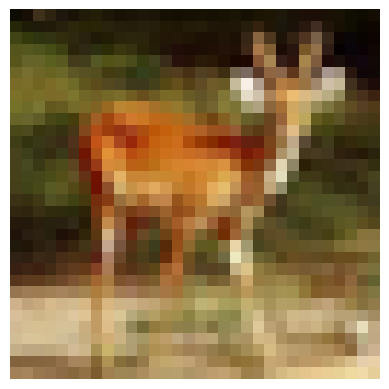

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis('off')
# trans[0] = ->飛機
# XX -> trans[ [0] ]
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [6]:
# 資料預處理
# 1. 題目預處理(Normalize)
# 卷積不需要攤開, 直接進去
x_train_shape =x_train / 255
x_test_shape =x_test / 255
#Demo  
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
# 2. 答案預處理(One-hot encoding)
# 跟上次一模一樣
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print('原來: ', y_train[1])
print('後來: ',y_train_cat[1])

原來:  [9]
後來:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
# 建立模型
# models(地基): Sequential(一層疊一層)
from tensorflow.keras.models import Sequential
# MLP
from tensorflow.keras.layers import Dense, Flatten
#ConV
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# (一個過濾器) 3 * 3 * 3 * (filter數目) 32 + (bias) 32 = 896
cnn.add(Conv2D(32, (3, 3),
               input_shape=(32, 32, 3),
                padding='same',
                activation='relu'
                ))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# (一個過濾) 3 * 3 * 32 * (filter數目) 64 + (bias) 64 = 18496
cnn.add(Conv2D(64, (3, 3),
                padding='same',
                activation='relu'
                ))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# (一個過濾) 3 * 3 * 64 * (filter數目) 128 + (bias) 128 = 73856
cnn.add(Conv2D(128, (3, 3),
                padding='same',
                activation='relu'
                ))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [9]:
#確定模型訓練方式 .... 等
#隨機(隨便一組weights) 梯度(正確方向) 下降
# loss: 最後輸出一個: binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度， 而是有速度的累積)
from tensorflow.keras.losses import CategoricalCrossentropy
cnn.compile(loss=CategoricalCrossentropy(), 
              metrics=["accuracy"],
              optimizer = 'adam'
              )


In [10]:

# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
cnn.fit(x_train_shape,
     y_train_cat,
     batch_size=200,
     epochs=15,
     validation_split=0.1)

Epoch 1/15
225/225 [==============================] - 8s 5ms/step - loss: 1.6148 - accuracy: 0.4140 - val_loss: 1.3141 - val_accuracy: 0.5318
Epoch 2/15
225/225 [==============================] - 1s 4ms/step - loss: 1.2046 - accuracy: 0.5766 - val_loss: 1.0790 - val_accuracy: 0.6224
Epoch 3/15
225/225 [==============================] - 1s 5ms/step - loss: 1.0281 - accuracy: 0.6422 - val_loss: 0.9552 - val_accuracy: 0.6688
Epoch 4/15
225/225 [==============================] - 1s 4ms/step - loss: 0.9113 - accuracy: 0.6814 - val_loss: 0.8830 - val_accuracy: 0.6962
Epoch 5/15
225/225 [==============================] - 1s 4ms/step - loss: 0.8148 - accuracy: 0.7156 - val_loss: 0.8368 - val_accuracy: 0.7156
Epoch 6/15
225/225 [==============================] - 1s 3ms/step - loss: 0.7352 - accuracy: 0.7419 - val_loss: 0.8270 - val_accuracy: 0.7210
Epoch 7/15
225/225 [==============================] - 1s 4ms/step - loss: 0.6714 - accuracy: 0.7667 - val_loss: 0.7796 - val_accuracy: 0.7314
Epoch 

In [11]:
cnn.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.8520 - accuracy: 0.7542


[0.8520334959030151, 0.7541999816894531]

In [ ]:
import pandas as pd
#predict: 機率 predict_classes: 分類
# trans = ['0飛機', '1汽車', '2鳥', '3貓', '4鹿',
#         '5狗', '6青蛙', '7馬', '8船', '9卡車']
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

c:\Users\TheSal\.conda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,819,20,39,24,19,4,4,19,23,29
1,17,870,8,10,3,5,9,8,8,62
2,64,7,697,57,62,31,20,50,5,7
3,26,12,70,570,48,169,25,61,7,12
4,21,5,74,76,650,26,17,113,13,5
5,14,5,47,161,27,653,10,74,3,6
6,14,11,69,96,44,43,685,23,6,9
7,10,2,28,37,34,29,3,850,1,6
8,103,46,18,16,6,10,3,9,763,26
9,38,71,6,18,4,3,3,31,13,813


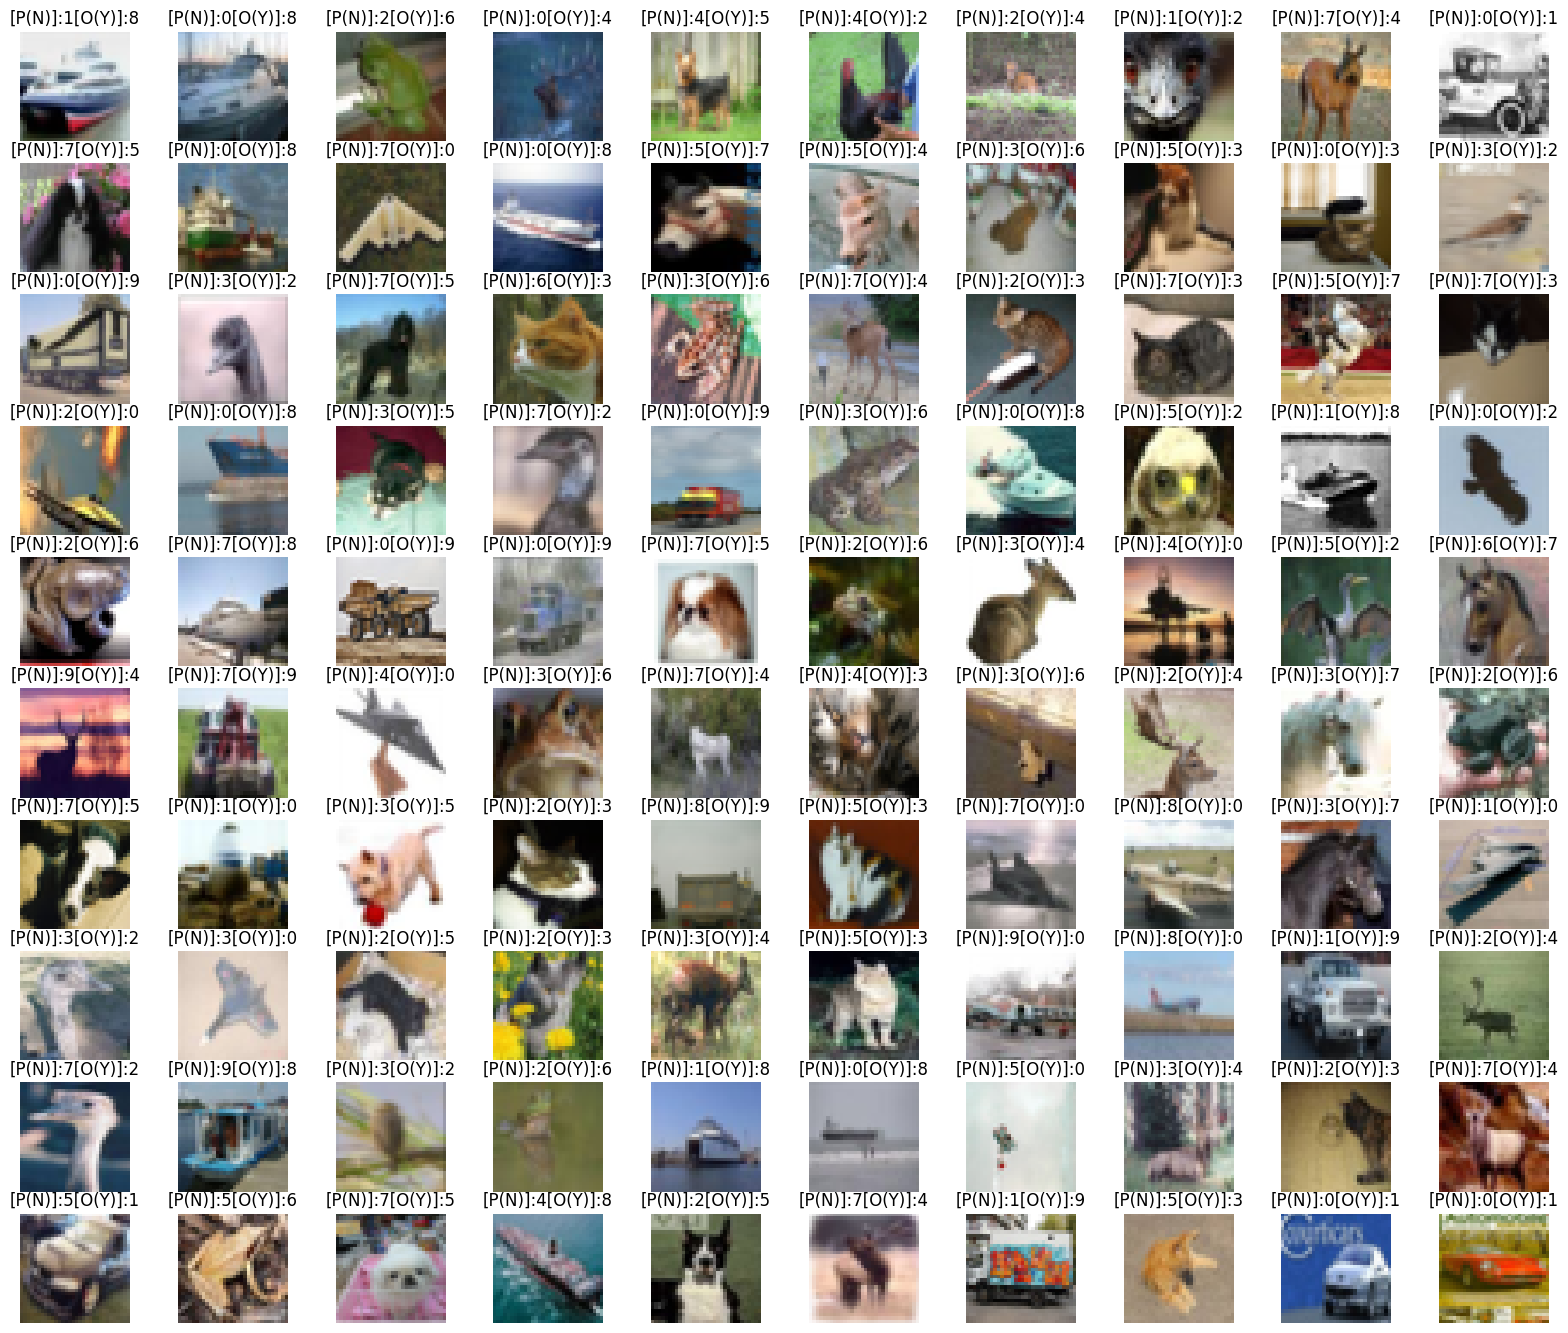

In [ ]:
import numpy as np
#  numpy 才能這樣直接每個數字比較
# list: listp][一個數字]
# numpy array: nparray[ [多個數字] ]
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
# 預測錯誤的圖的原本標籤
orifalse = y_dim[diff]
# 預測錯誤的圖的預測標籤
prefalse =pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖的寬高
plt.figure(figsize=(20,450))
# 我們每一個列就是10個
width = 10
height = int(len(imgfalse) / 10) + 1
for (i, img) in enumerate(imgfalse[0:100]):
    #(列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis('off')
    t = '[P(N)]:' + str(prefalse[i]) + '[O(Y)]:' + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)
# trans = ['0飛機', '1汽車', '2鳥', '3貓', '4鹿',
#         '5狗', '6青蛙', '7馬', '8船', '9卡車']